In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
xl = pd.ExcelFile("StockX-Data-Contest-2019-3.xlsx")
df = xl.parse("Raw Data")
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


<AxesSubplot:title={'center':'Average Sale Price by Brands'}>

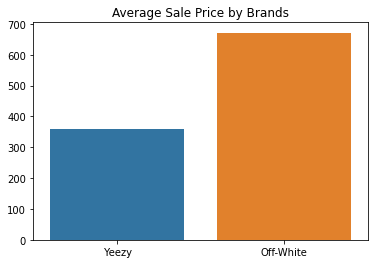

In [98]:
plt.figure()
plt.title("Average Sale Price by Brands")
sns.barplot(df.Brand.unique(), df.groupby("Brand")["Sale Price"].mean().values)

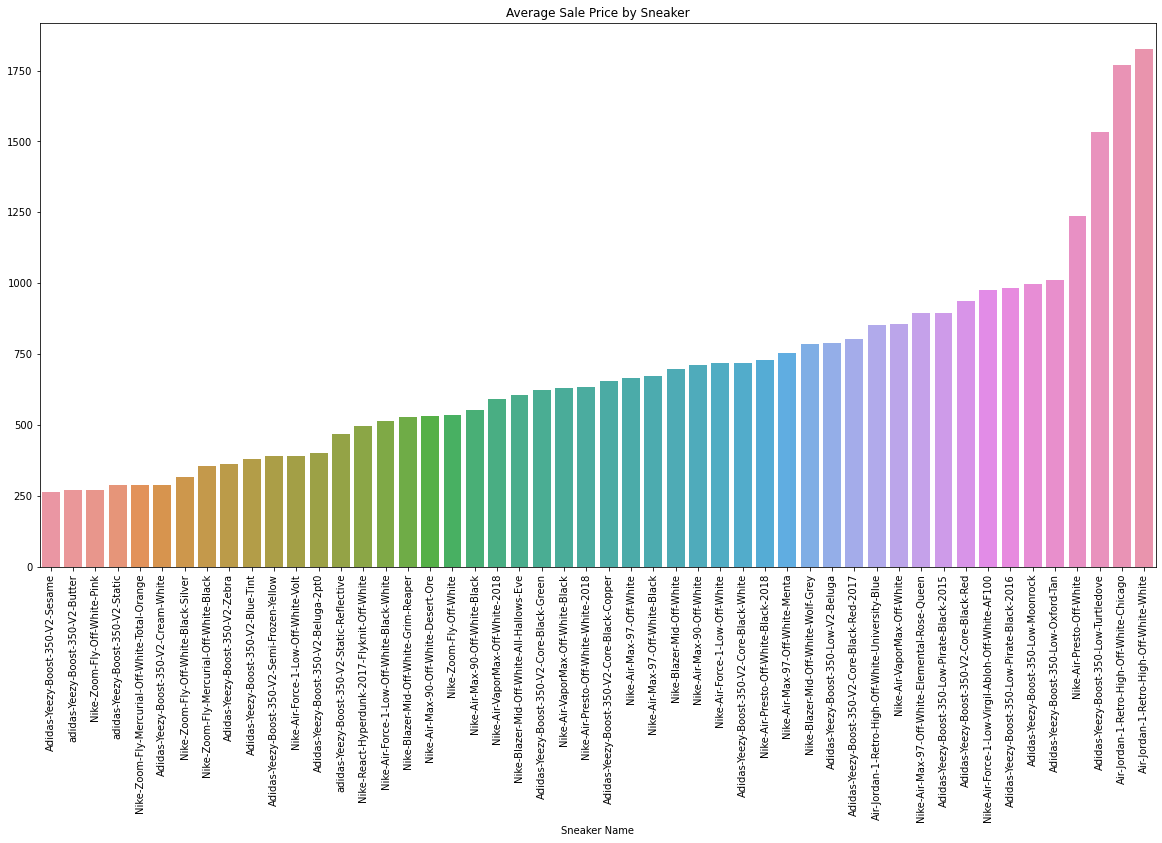

In [99]:
plt.figure(figsize=(20,10))
plt.title("Average Sale Price by Sneaker")
sns.barplot(df.groupby("Sneaker Name")["Sale Price"].mean().sort_values().index, df.groupby("Sneaker Name")["Sale Price"].mean().sort_values().values)
ax = plt.xticks(rotation=90)

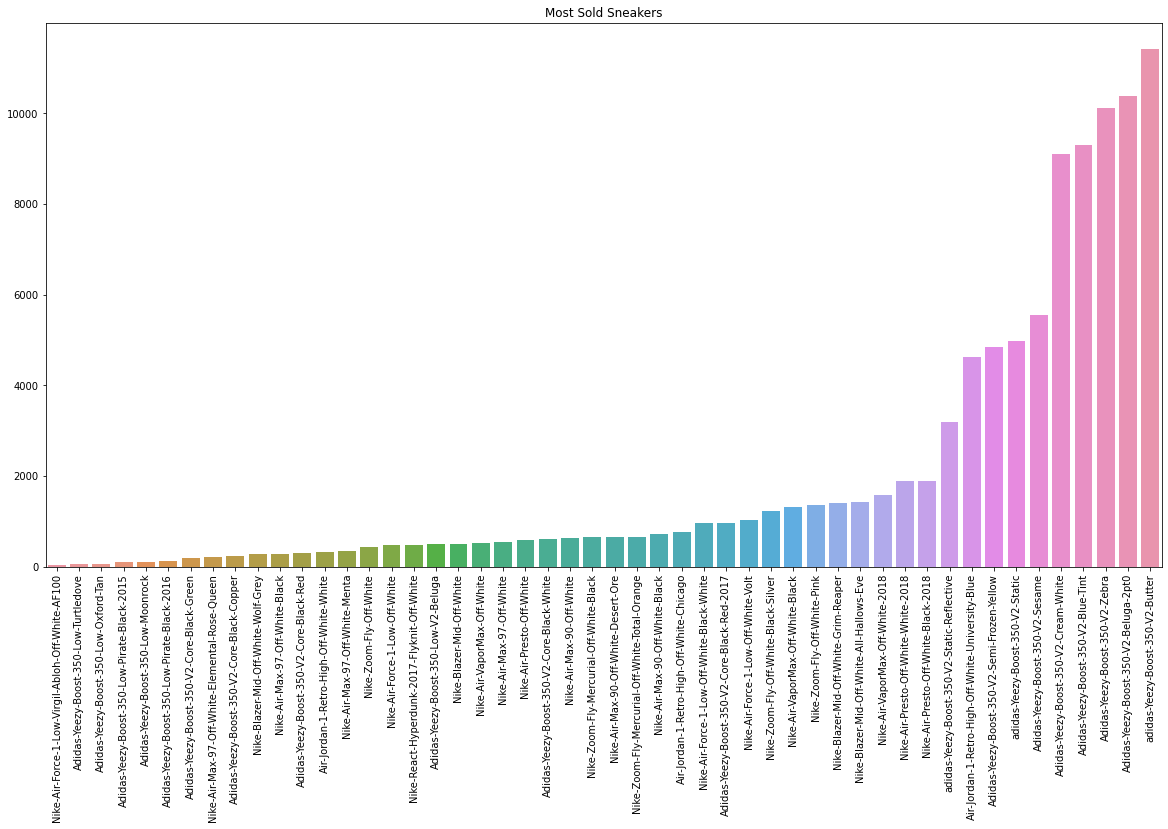

In [100]:
plt.figure(figsize=(20,10))
plt.title("Most Sold Sneakers")
g = sns.barplot(df["Sneaker Name"].value_counts().sort_values().index, df["Sneaker Name"].value_counts().sort_values().values)
ax = plt.xticks(rotation=90)

In [101]:
df['diff'] = df["Sale Price"] - df["Retail Price"]

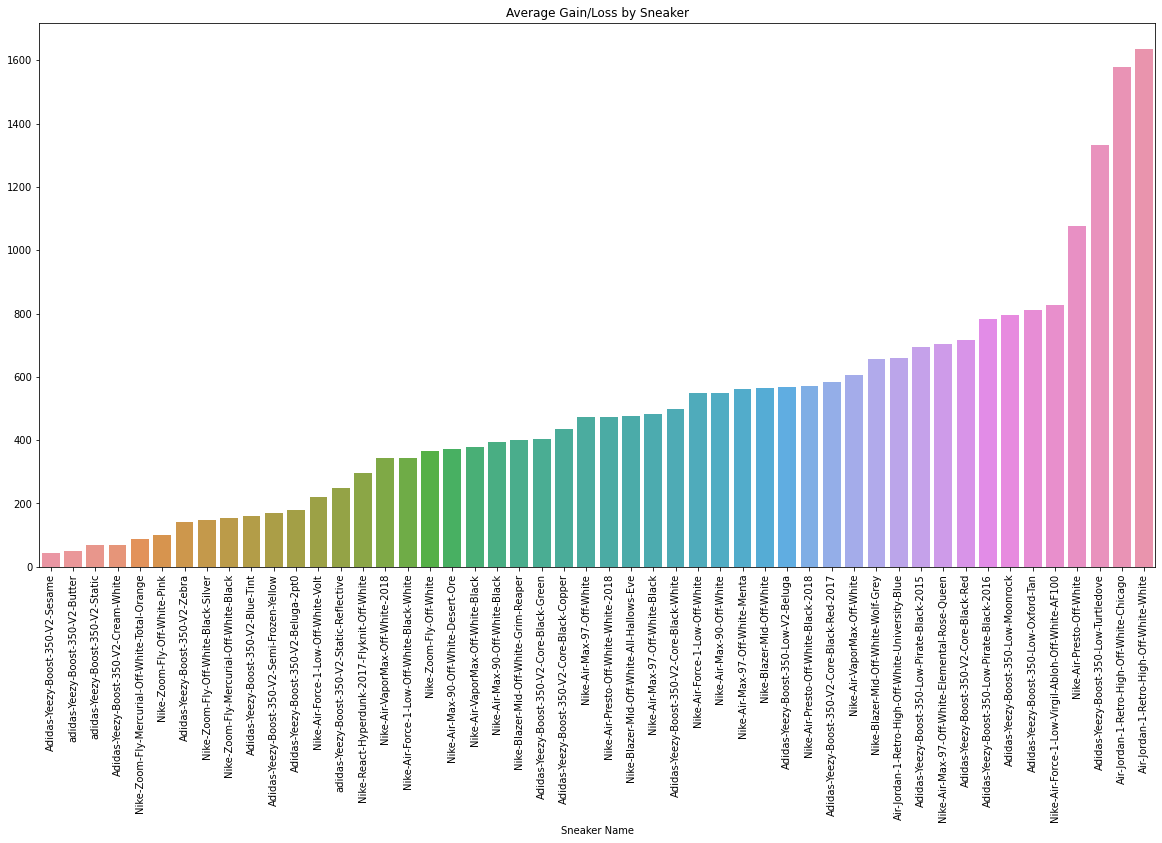

In [102]:
plt.figure(figsize=(20,10))
plt.title("Average Gain/Loss by Sneaker")
sns.barplot(df.groupby("Sneaker Name")["diff"].mean().sort_values().index, df.groupby("Sneaker Name")["diff"].mean().sort_values().values)
ax = plt.xticks(rotation=90)

In [103]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,diff
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0


In [104]:
df['days_from_release'] = (pd.to_datetime(df["Order Date"]) - pd.to_datetime(df['Release Date'])).dt.days

In [106]:
df.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,diff,days_from_release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,202
5,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220,2017-02-11,8.5,Michigan,578.0,202
6,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220,2016-12-17,11.0,California,564.0,258
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220,2017-04-29,10.0,New York,240.0,125
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Kansas,245.0,125
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Florida,245.0,125


In [114]:
def scatter_by_sneaker(sneaker):
    temp = df.loc[df['Sneaker Name'] == sneaker][["Sale Price", "Retail Price", "Shoe Size","diff", "days_from_release"]]
    g = pd.plotting.scatter_matrix(temp, diagonal = "kde", figsize = (10, 10))

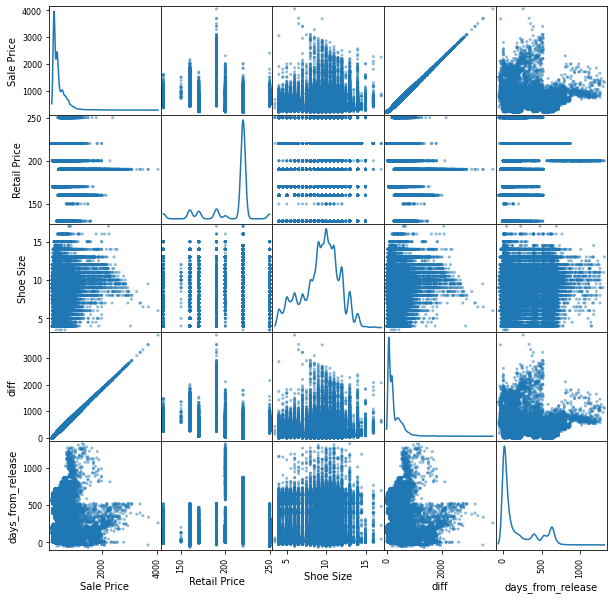

In [116]:
temp = df[["Sale Price", "Retail Price", "Shoe Size","diff", "days_from_release"]]
g = pd.plotting.scatter_matrix(temp, diagonal = "kde", figsize = (10, 10))